In [1]:
from math import sqrt

import torch
import matplotlib.pyplot as plt

from simple_truss import Truss

torch.set_default_dtype(torch.double)

# Sample truss

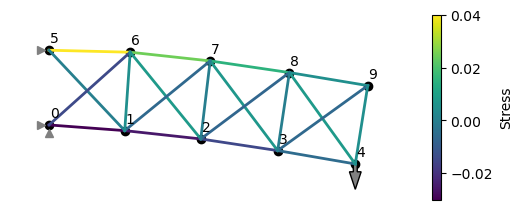

In [2]:
n1 = torch.linspace(0.0, 4.0, 5)
n2 = torch.linspace(0.0, 1.0, 2)
n1, n2 = torch.stack(torch.meshgrid(n1, n2, indexing="xy"))
nodes = torch.stack([n1.ravel(), n2.ravel()], dim=1)

elements = [
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [5, 6],
    [6, 7],
    [7, 8],
    [8, 9],
    [1, 5],
    [0, 6],
    [2, 6],
    [1, 7],
    [3, 7],
    [2, 8],
    [4, 8],
    [3, 9],
    [1, 6],
    [2, 7],
    [3, 8],
    [4, 9],
]

forces = torch.zeros_like(nodes)
forces[4, 1] = -0.1
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[0, 0] = True
constraints[0, 1] = True
constraints[5, 0] = True
areas = 10 * torch.ones((len(elements)))

truss_sample = Truss(nodes, elements, forces, constraints, areas, E=1.0)
u, f, sigma = truss_sample.solve()
truss_sample.plot(u=u, sigma=sigma)
plt.savefig("figures/truss_sample_solved.pdf", bbox_inches="tight")
plt.show()

## Single truss element

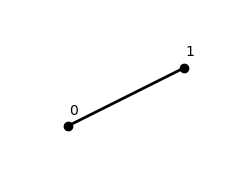

In [3]:
nodes = torch.tensor([[0.0, 0.0], [1.0, 0.5]])
elements = torch.tensor([[0, 1]])
forces = torch.zeros_like(nodes)
constraints = torch.zeros_like(nodes, dtype=bool)
areas = torch.ones((len(elements)))

plt.figure(figsize=(3, 3))
single_truss = Truss(nodes, elements, forces, constraints, areas, E=1.0)
single_truss.plot()
plt.savefig("figures/single_truss.pdf", bbox_inches="tight")
plt.show()

## Three bar truss

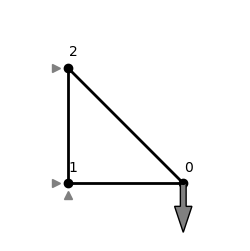

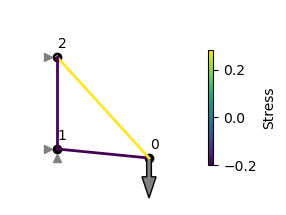

In [4]:
nodes = torch.tensor([[1.0, 0.0], [0.0, 0.0], [0.0, 1.0]])
elements = [[0, 1], [0, 2], [1, 2]]
forces = torch.zeros_like(nodes)
forces[0, 1] = -0.2
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[1, 0] = True
constraints[1, 1] = True
constraints[2, 0] = True
areas = torch.ones((len(elements)))

three_bar_truss = Truss(nodes, elements, forces, constraints, areas, E=10.0)
plt.figure(figsize=(3, 3))
three_bar_truss.plot()
plt.savefig("figures/three_bar_truss.pdf", bbox_inches="tight", transparent=True)
plt.show()

u, f, sigma = three_bar_truss.solve()
plt.figure(figsize=(3, 3))
three_bar_truss.plot(u=u, sigma=sigma)
plt.savefig("figures/three_bar_truss_solved.pdf", bbox_inches="tight", transparent=True)
plt.show()